### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

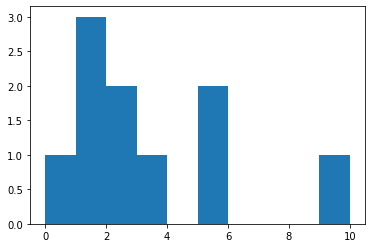

In [9]:
plt.hist(X[1])
plt.show()

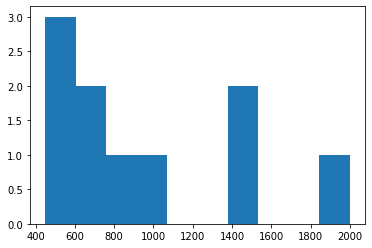

In [10]:
plt.hist(X[2])
plt.show()

In [39]:
X_st = X.copy()
#X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [40]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   0,    0,    0,    0,    0,   -1,    0,    2,    0,    0],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

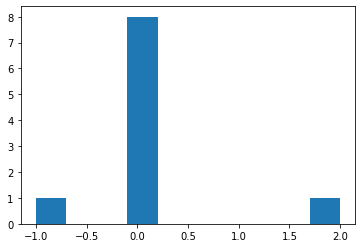

In [41]:
plt.hist(X_st[1])
plt.show()

In [42]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [43]:
sklearn.StandartScaler() #Стандартизайия
sklearn.MinMaxScaler() #Нормализация

AttributeError: module 'sklearn' has no attribute 'StandartScaler'

In [44]:
X_st[2] = calc_std_fit(X[2])

In [45]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0, -1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  2, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0]])

SGD (Stochastic gradient descent)

In [46]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [47]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W,err)
    return W

In [48]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [45.44935887  5.55754209  7.7943593  11.6652197 ] 93.80667371375618
200 [51.39863027  5.24816226  5.63731299 12.04011684] 42.20956893040723
300 [52.41962956  5.64053604  4.31011996 12.25555082] 38.87425479079283
400 [52.62800474  6.16516362  3.47437036 12.58664965] 37.72616098863
500 [52.66969684  6.60906017  2.85035349 12.96647055] 36.9884129405156
600 [52.6686264   6.95020436  2.34509867 13.36341018] 36.45644115353106
700 [52.6525881   7.20642564  1.92152855 13.76318286] 36.04968869267596
800 [52.62947243  7.39824779  1.55929337 14.15783128] 35.72439455448651
900 [52.6024799   7.54228503  1.24477951 14.54238677] 35.45545954656864
1000 [52.57339088  7.65104213  0.96813725 14.91368743] 35.227931261906136


array([52.57339088,  7.65104213,  0.96813725, 14.91368743])

In [49]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [50]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [52.02887739  8.11149261 -2.11985822 20.44600084] 40.43913520468228
10000 [51.96594665  8.13371258 -2.43273404 21.05092105] 42.01241409737107
15000 [51.96326367  8.13465985 -2.44607306 21.07671105] 42.080973920071074
20000 [51.96314929  8.13470024 -2.44664175 21.07781057] 42.08389957842965
25000 [51.96314441  8.13470196 -2.446666   21.07785745] 42.08402431497075
30000 [51.9631442   8.13470204 -2.44666703 21.07785945] 42.08402963295967
35000 [51.96314419  8.13470204 -2.44666707 21.07785953] 42.08402985968533
40000 [51.96314419  8.13470204 -2.44666708 21.07785954] 42.08402986935148
45000 [51.96314419  8.13470204 -2.44666708 21.07785954] 42.08402986976026
50000 [51.96314419  8.13470204 -2.44666708 21.07785954] 42.08402986977368


array([51.96314419,  8.13470204, -2.44666708, 21.07785954])

L1 регуляризация

L2 регуляризация

In [51]:
# lambda = lambda_/2

In [92]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [200]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [201]:
W

array([52.01672221,  8.11710229, -2.17087131, 20.53725481])

In [99]:
eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [5.08783168 0.84935733 3.17840483 2.15991687] 2624.966571542843
1000 [9.84149156 1.74865438 4.51075694 3.36217504] 2091.560687179998
1500 [14.09061208  2.4910754   5.6139721   4.39930616] 1672.905189357022
2000 [17.89155314  3.10019676  6.52072532  5.2931759 ] 1343.5927688621125
2500 [21.2941354   3.59634263  7.25931518  6.06282935] 1083.9532754235781
3000 [24.34241927  3.99701429  7.8542324   6.72484982] 878.7412282572113
3500 [27.07538952  4.31726403  8.3266556   7.29367242] 716.1261275912964
4000 [29.52755697  4.57002084  8.69488376  7.781858  ] 586.9153330801895
4500 [31.72948752  4.76637387  8.97471325  8.20033244] 483.9556207157153
5000 [33.70826732  4.91581921  9.17976645  8.55859574] 401.67206336095535


array([33.70826732,  4.91581921,  9.17976645,  8.55859574])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [159]:
lambdas=np.linspace(1e-4, 1e-1, 100)
y1 =np.array([eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lam)[0] for lam in lambdas])
y2 =np.array([eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lam)[1] for lam in lambdas])
y3=np.array([eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lam)[2] for lam in lambdas])
y4=np.array([eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lam)[3] for lam in lambdas])


In [115]:
import matplotlib.pyplot as plt

%matplotlib inline

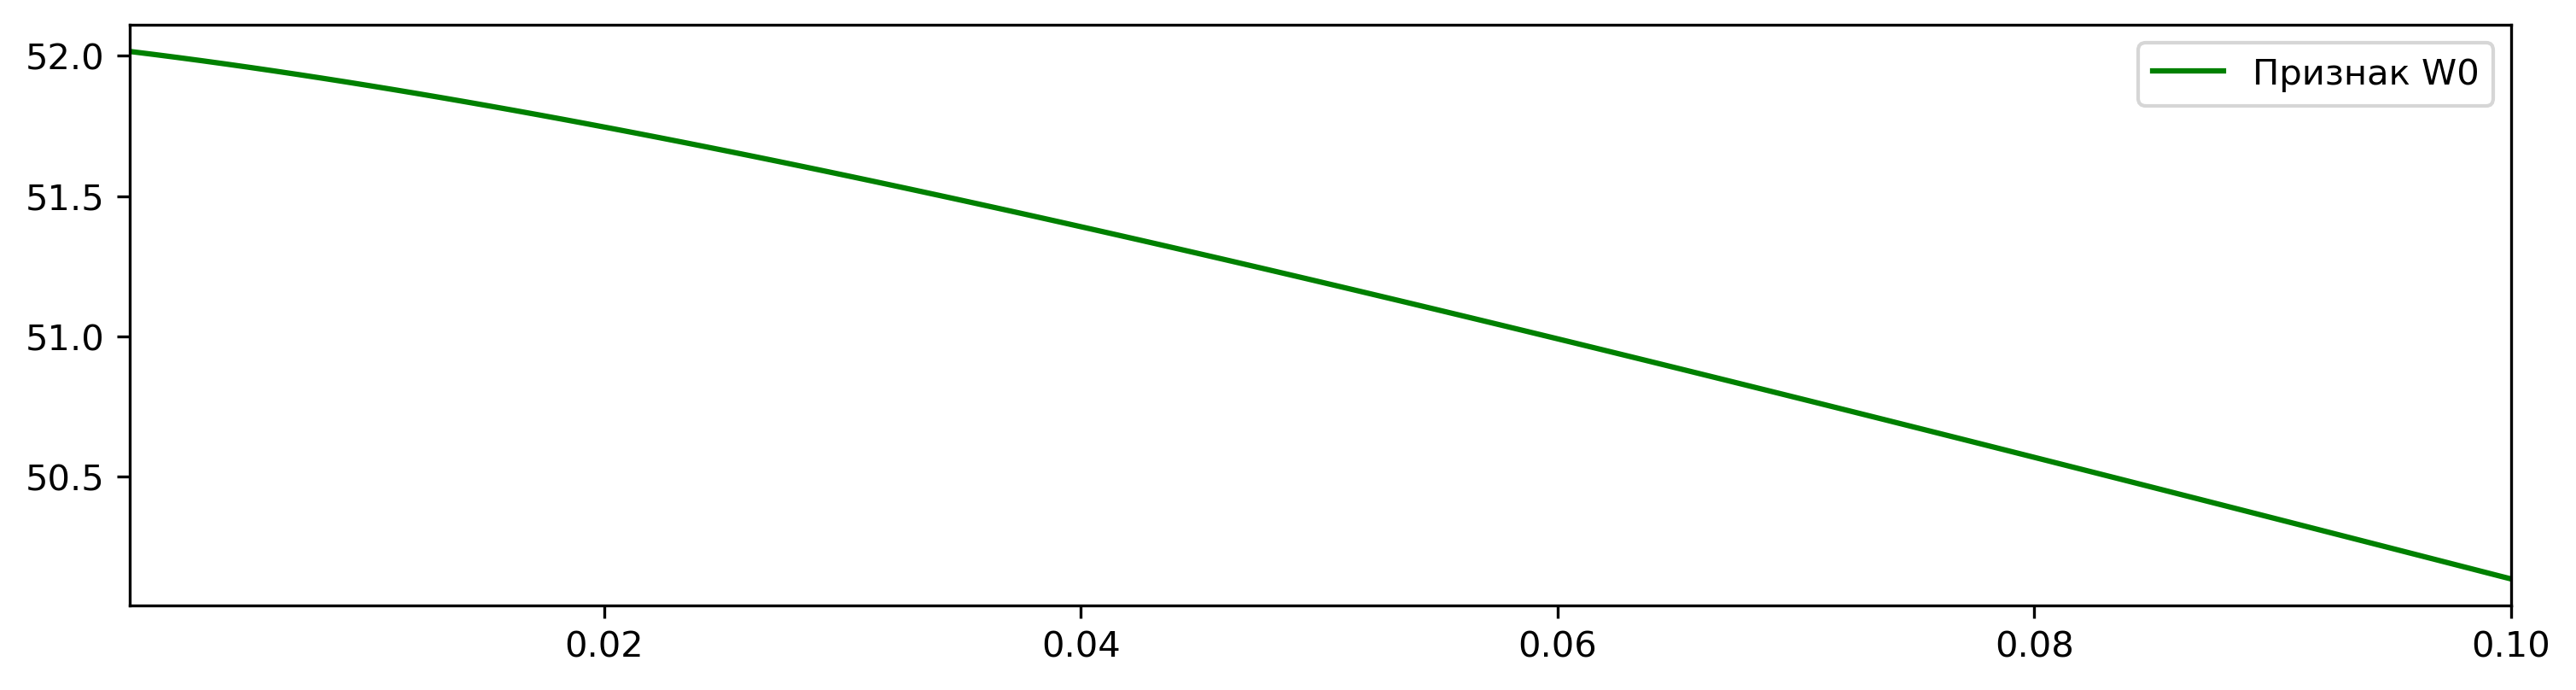

In [171]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
plt.xlim(1e-4,0.1)
plt.plot(lambdas, y1, color='g', label = 'Признак W0')
plt.legend()


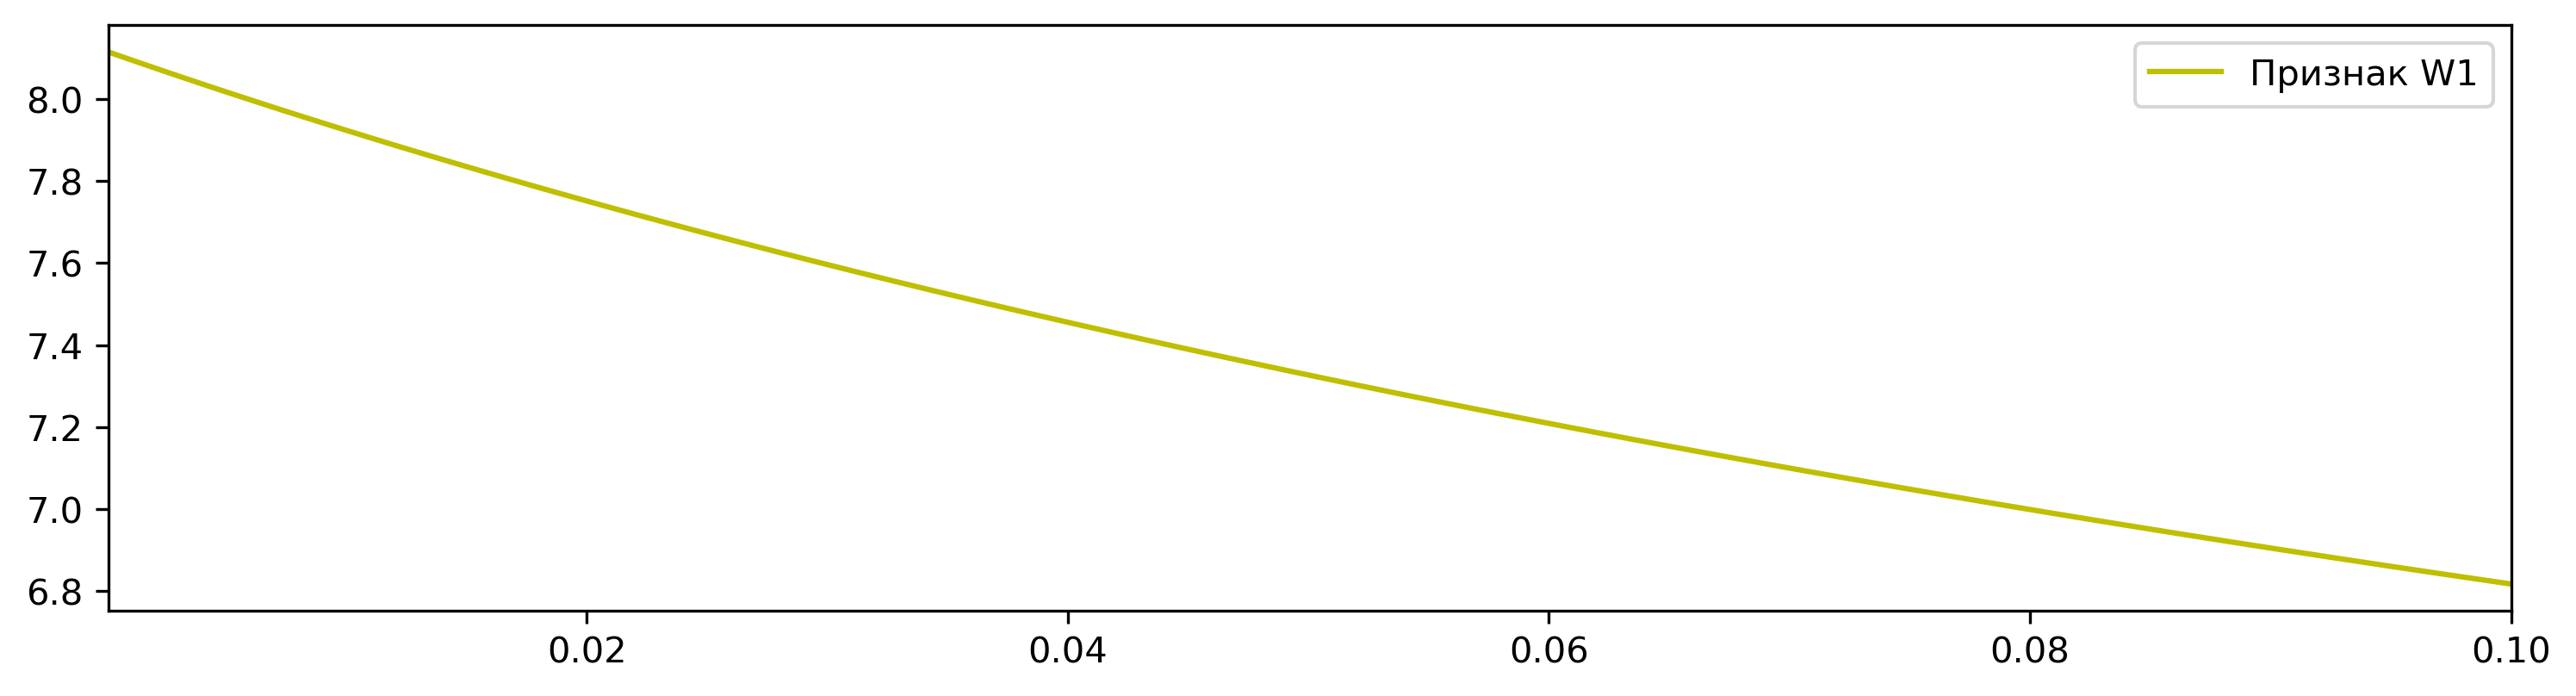

In [178]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
plt.xlim(1e-4,0.1)
plt.plot(lambdas, y2, color='y', label =  'Признак W1')
plt.legend()

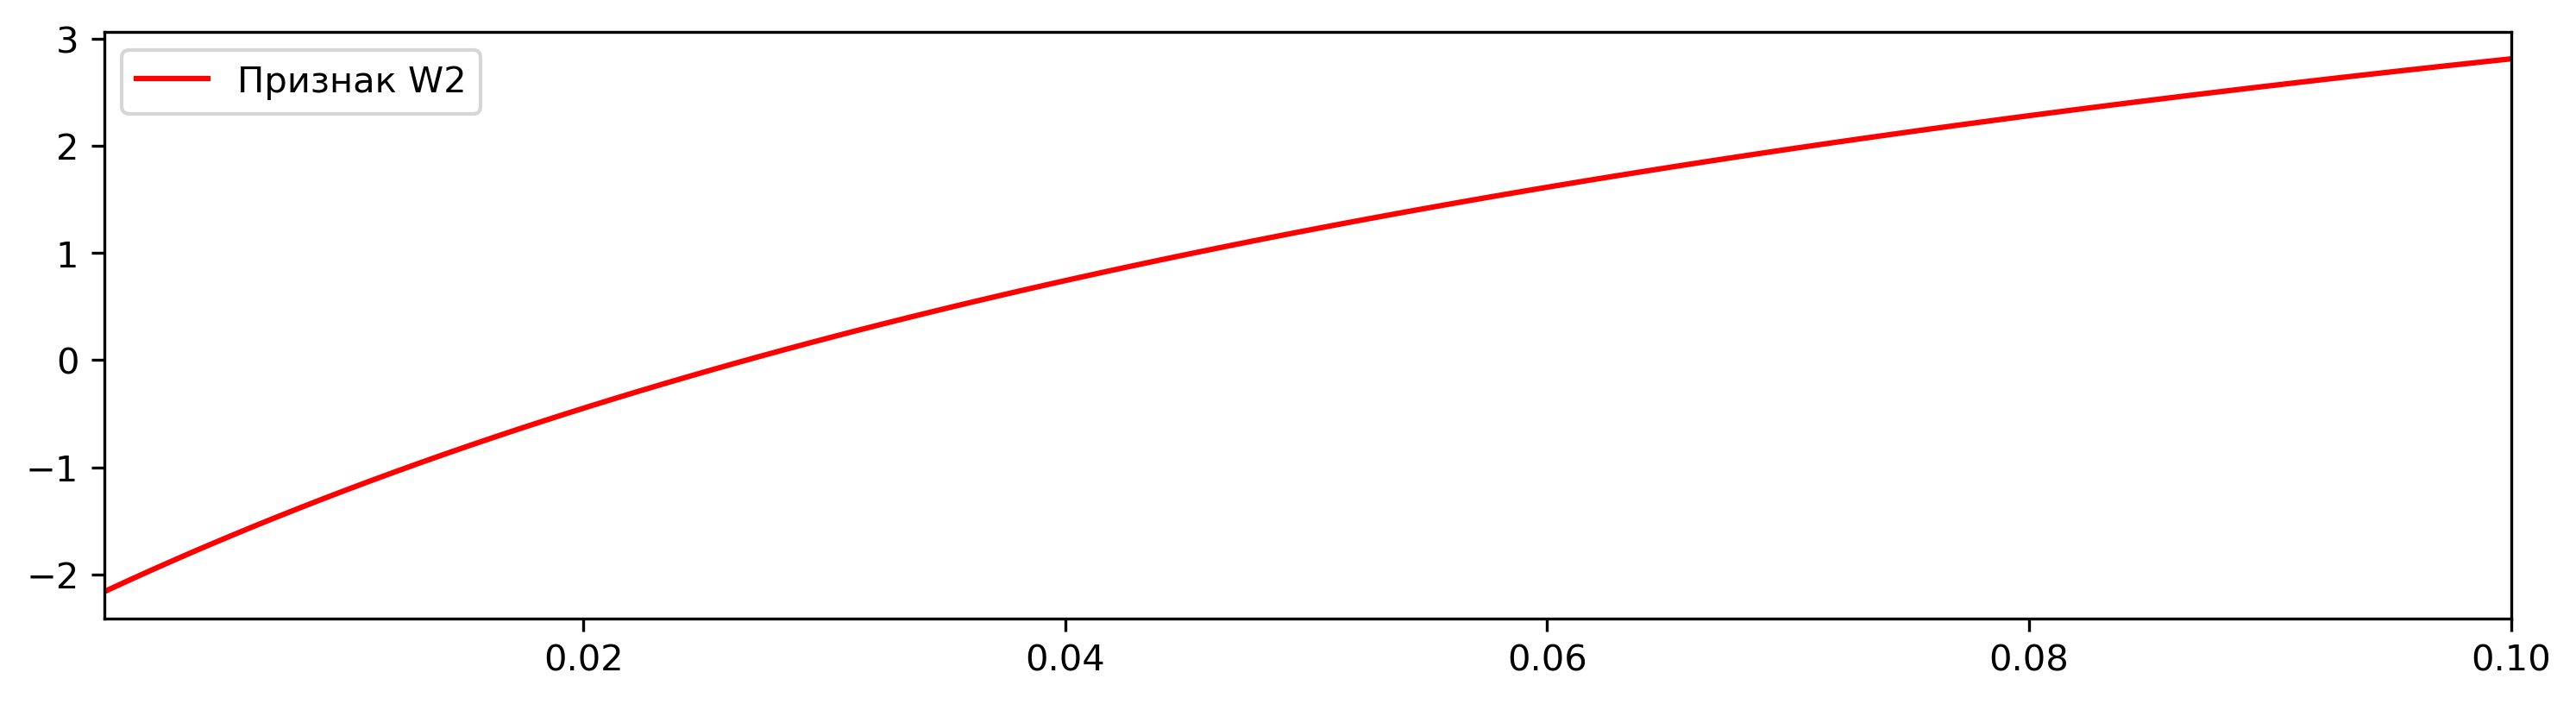

In [179]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
plt.xlim(1e-4,0.1)
plt.plot(lambdas, y3, color='r', label = 'Признак W2')
plt.legend()

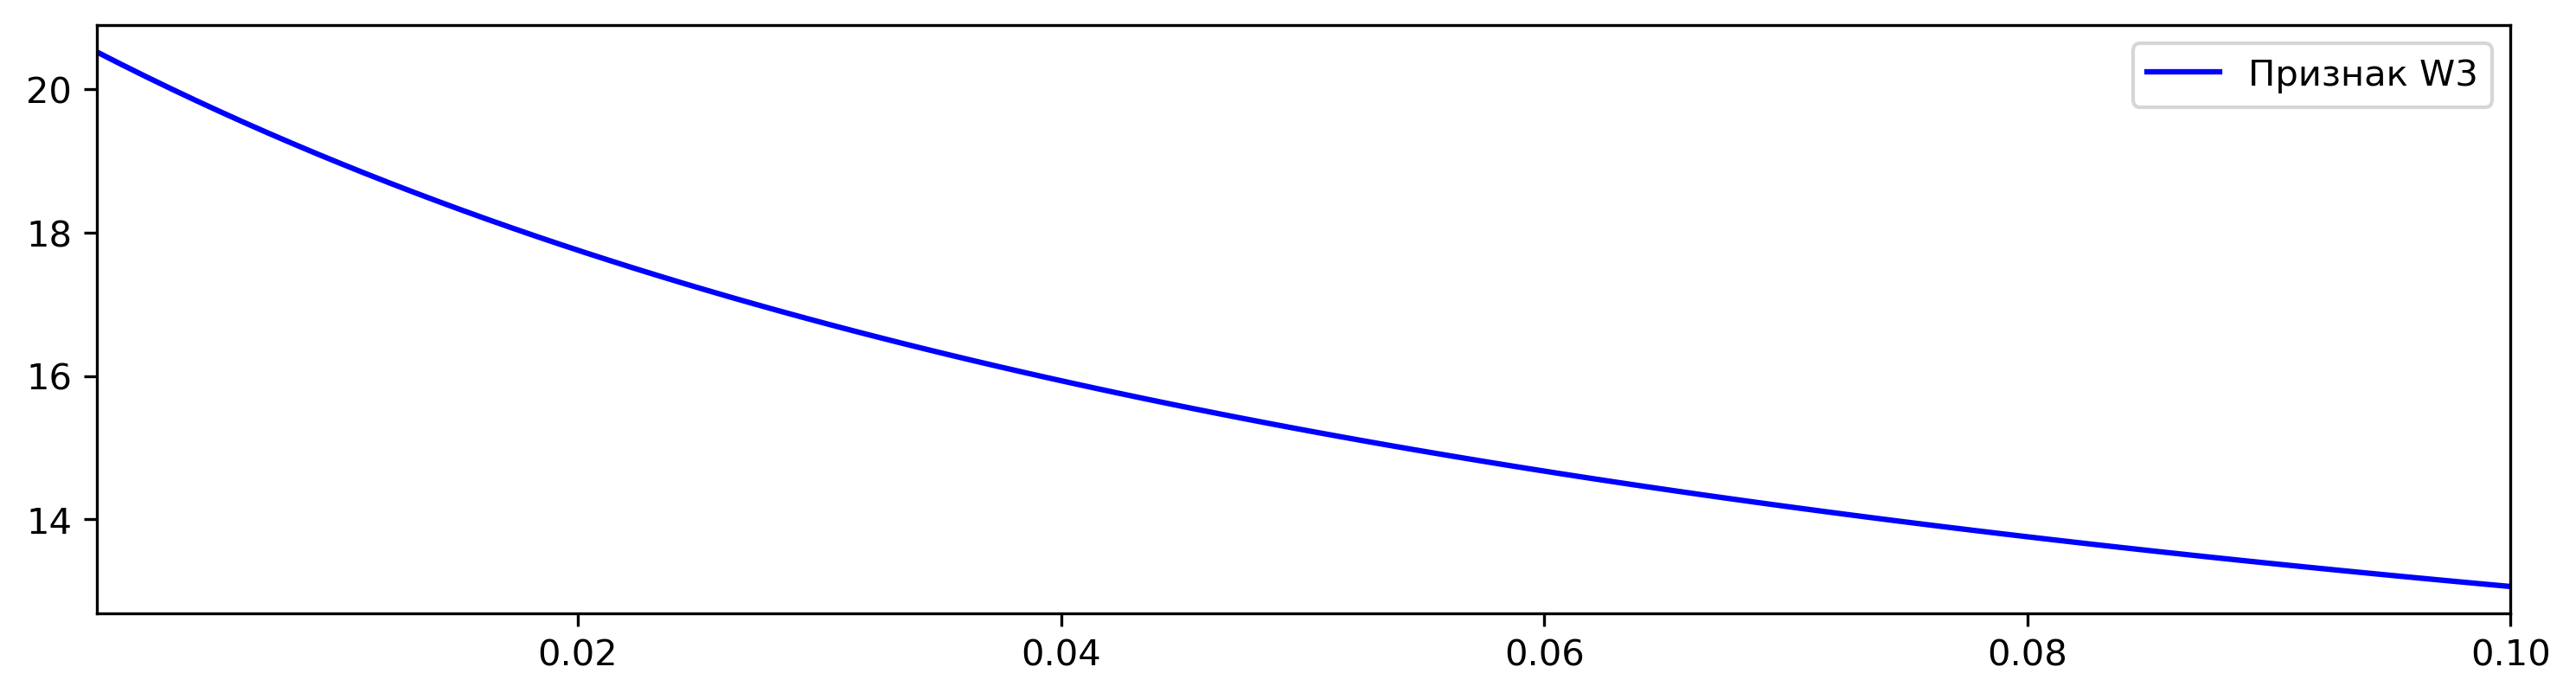

In [180]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)
plt.xlim(1e-4,0.1)
plt.plot(lambdas, y4, color='b', label = 'Признак W3')
plt.legend()

#### С ростом лямбда наблюдается  уменьшение скорости изменения весов признаков 

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Технически это возможно, но зачем?

In [204]:
X_norm1 = X.copy()
X_norm1[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

In [205]:
Xnorm_st =X_norm
X1_mean = X_norm[1].mean()
X1_std = X_norm[1].std()
X2_mean = X_norm[2].mean()
X2_std = X_norm[2].std()
Xnorm_st[1] = (X_norm[1] - X1_mean) / X1_std
Xnorm_st[2] = (X_norm[2] - X2_mean) / X2_std
Xnorm_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01, -1.96261557e-16, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [-9.79589689e-01, -5.67130873e-01, -4.64016169e-01,
        -7.73360281e-01,  9.79589689e-01, -3.60901465e-01,
         1.08270439e+00,  2.11385144e+00, -1.08270439e+00,
         5.15573521e-02],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

In [207]:
W = eval_model_reg2(Xnorm_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W

array([40.68025168,  6.29169252, -0.96785837,  9.28067975])

#### Рзультат получается иной, чем если делать в отдельности стандартизацию и нормализацию признаков

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [196]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [197]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [198]:
W

array([52.01672221,  8.11710229, -2.17087131, 20.53725481])